In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sys
import warnings 
import os 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

import librosa
import librosa.display
import IPython.display as ipd



Ravdess = "/home/fekef/sentiment-analysis/ravdess/audio_speech_actors_01-24/" # Ryerson Audio-Visual Database of Emotional Speech and Song 
Crema = "/home/fekef/sentiment-analysis/crema/AudioWAV/" # Crowd-sourced Emotional Mutimodal Actors Dataset
Tess = "/home/fekef/sentiment-analysis/tess/TESS Toronto emotional speech set data/" # Toronto emotional speech set
Savee = "/home/fekef/sentiment-analysis/savee/" # Surrey Audio-Visual Expressed Emotion

# Ravdess
## About Dataset
### Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
Speech audio-only files (16bit, 48kHz .wav) from the Ravdess. Full dataset of speech and song, audio and video (24.8 GB) available from Zenodo. Construction and perceptual validation of the Ravdess is described in our Open Access paper in PLoS ONE.

Check out our Kaggle Song emotion dataset.

### Files

This portion of the Ravdess contains 1440 files: 60 trials per actor x 24 actors = 1440. The Ravdess contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

### File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.

### How to cite the Ravdess

Academic citation

If you use the Ravdess in an academic publication, please use the following citation: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

All other attributions

If you use the Ravdess in a form other than an academic publication, such as in a blog post, school project, or non-commercial product, please use the following attribution: "The Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.


In [2]:
ravdess_dir_lis = os.listdir(Ravdess)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(Ravdess, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{Ravdess}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
1,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
2,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
3,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
4,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,happy


# Crema

In [3]:
crema_dir_list = os.listdir(Crema)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{Crema}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,angry
1,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,disgust
2,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,fear
3,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,happy
4,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,sad


In [4]:
tess_dir_list = os.listdir(Tess)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(Tess, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{Tess}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
1,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
2,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
3,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
4,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear


In [5]:
df = pd.concat([
    ravdess_df,
    crema_df,
    tess_df
], axis = 0)
df.head()

,path,sex,emotion
0,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
1,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
2,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
3,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
4,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,happy


# EDA

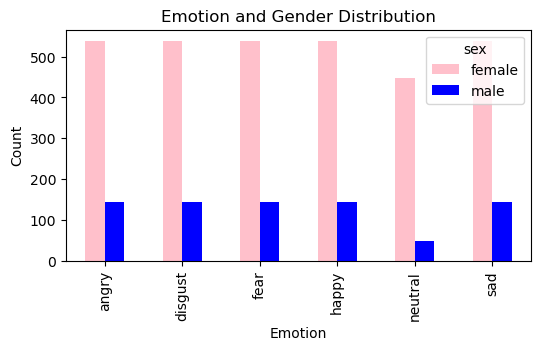

In [6]:
def plot_distribution(df):
    countTable = df.groupby(["emotion", "sex"]).count()
    pivotTable = countTable.pivot_table(index= "emotion", columns = "sex", values = "path")

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    
plot_distribution(df)
    

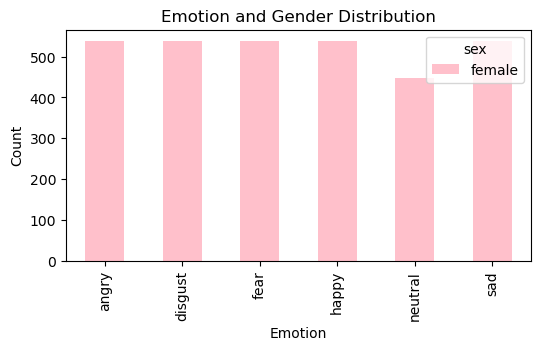

In [7]:
df = df[df['sex'] == 'female']
plot_distribution(df)

In [8]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
44,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
45,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
46,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
47,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
48,/home/fekef/sentiment-analysis/ravdess/audio_s...,happy


In [9]:
from IPython.display import Audio

def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

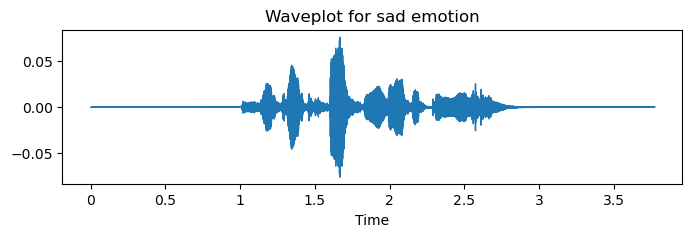

In [10]:
emotion_label = 'sad'
title = f"Waveplot for {emotion_label} emotion"
path = np.array(df.path[df.emotion == emotion_label])[1]
y, sr = librosa.load(path)

create_waveplot(y, sr, title)
Audio(path)

### Preprocessing

In [11]:
!pip install pydub


In [12]:
from pydub import AudioSegment, effects

In [13]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)

    samples = np.array(raw_audio.get_array_of_samples(), dtype="float32")
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000 - len(trimmed)), "constant")
    return padded, sr

    
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

# Extract Features

### Frequency on the Hertz scale (Hz) vs. Log-Mel scale . How does the human ear work?

The human ear does not distinguish all frequencies with the same precision and does not listen to all frequencies with the same intensity.

The cochle is the organ responsible for the perception of sound

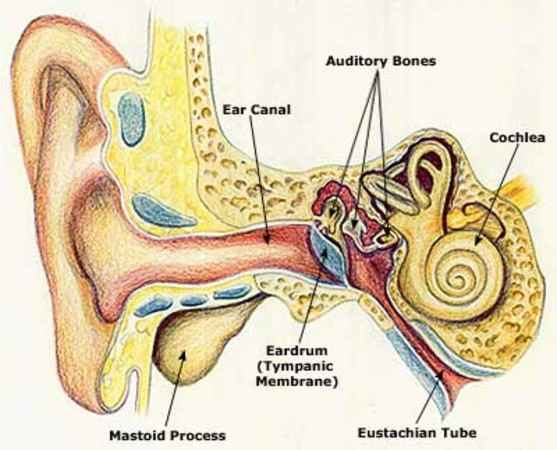

The perception is seen like this:

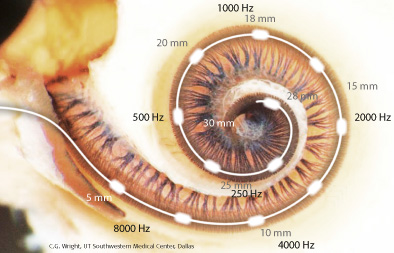

We transform between scales using a map between the hertz frequencies of sound and those perceived by the human ear:

### Mel-Frequency Cepstral Coefficients

Captures the shape of the spectral envelope of a signal

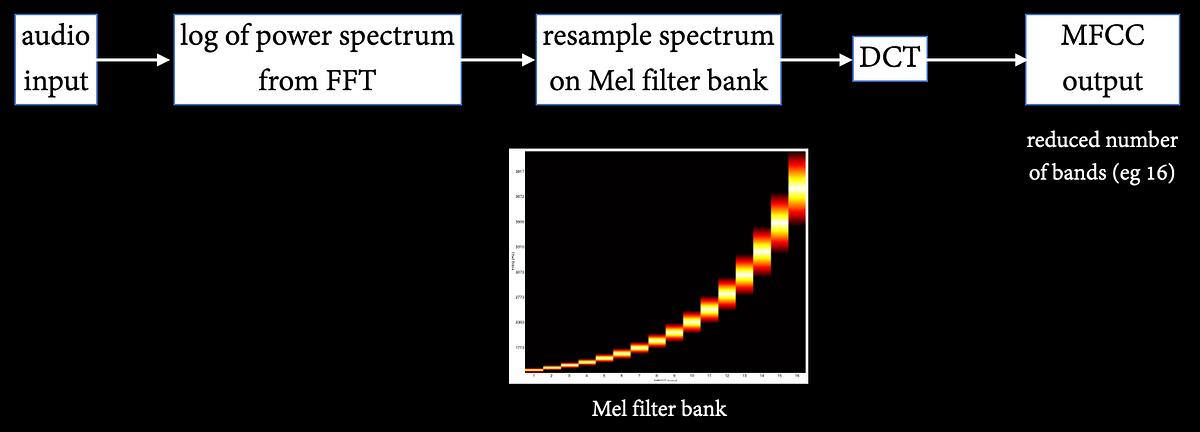

### Zero-Crossing Rate

Captures the number of times a signal changes sign per second

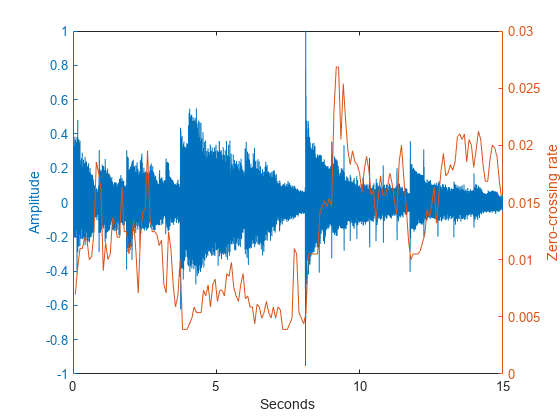

 ### Root Mean Square Energy

Captures the root mean square amplitude of the audio signal

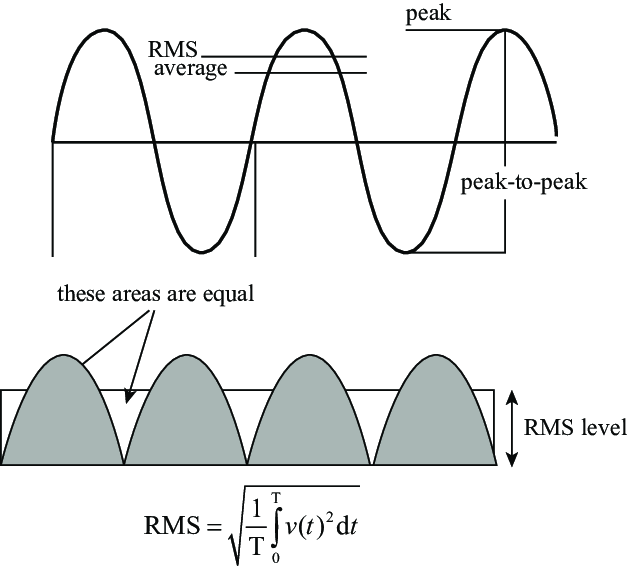

In [14]:
import numpy as np

zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try:
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))

    except Exception as e:
        print(f"Error processing {row.path}: {str(e)}")


Error processing /home/fekef/sentiment-analysis/ravdess/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav: index can't contain negative values


In [15]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype("float32")

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype("int8")

# LSTM

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [18]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [23]:
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 352, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 53894 (210.52 KB)
Trainable params: 53894 (210.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [24]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.01, patience=100)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train_class, epochs=200, batch_size=6, validation_data=(X_val, y_val_class))

Epoch 1/200
461/461 [==============================] - 50s 104ms/step - loss: 1.5439 - categorical_accuracy: 0.3054 - val_loss: 1.4308 - val_categorical_accuracy: 0.4015
Epoch 2/200
461/461 [==============================] - 48s 103ms/step - loss: 1.3536 - categorical_accuracy: 0.4005 - val_loss: 1.3551 - val_categorical_accuracy: 0.4394
Epoch 3/200
461/461 [==============================] - 47s 103ms/step - loss: 1.2703 - categorical_accuracy: 0.4624 - val_loss: 1.2392 - val_categorical_accuracy: 0.4583
Epoch 4/200
461/461 [==============================] - 47s 102ms/step - loss: 1.1751 - categorical_accuracy: 0.5170 - val_loss: 1.2247 - val_categorical_accuracy: 0.4886
Epoch 5/200
461/461 [==============================] - 47s 102ms/step - loss: 1.1048 - categorical_accuracy: 0.5456 - val_loss: 1.0871 - val_categorical_accuracy: 0.5530
Epoch 6/200
461/461 [==============================] - 47s 102ms/step - loss: 1.0336 - categorical_accuracy: 0.5897 - val_loss: 1.0510 - val_categoric

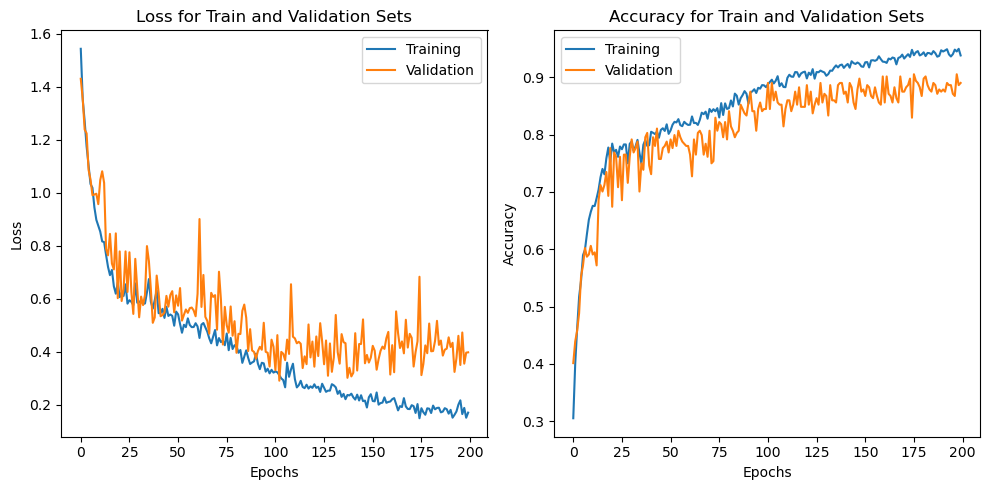

In [25]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(model.history['loss'])
axes[0].plot(model.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(model.history['categorical_accuracy'])
axes[1].plot(model.history['val_categorical_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

9/9 [==============================] - 0s 44ms/step


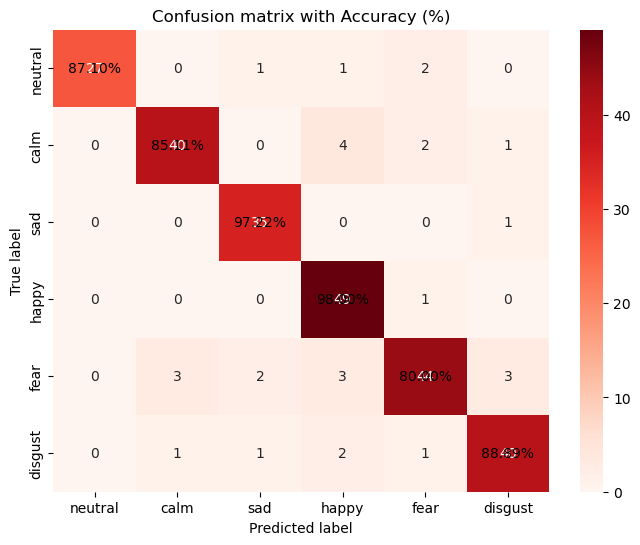

In [31]:
from sklearn.metrics import confusion_matrix

# Assuming you already have y_val_class and X_val defined
# Assuming MODEL is your trained model

# Get predictions
y_pred = np.argmax(MODEL.predict(X_val), axis=1)

# Define class labels
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust']

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

# Calculate accuracy for each class
class_accuracy = np.diag(cm) / cm.sum(axis=1)

# Create a new figure
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)

# Add accuracy percentages to each cell
for i in range(len(labels)):
    plt.text(i + 0.5, i + 0.5, f'{class_accuracy[i]*100:.2f}%', color='black', ha='center', va='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix with Accuracy (%)')
plt.show()


9/9 [==============================] - 0s 42ms/step


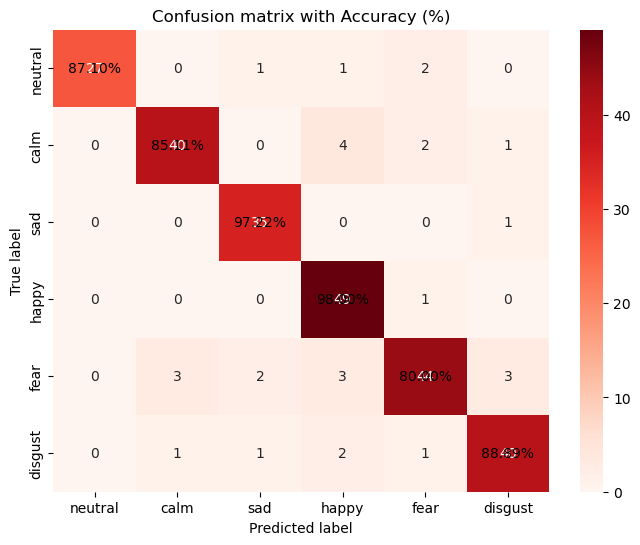

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have y_val_class and X_val defined
# Assuming MODEL is your trained model

# Get predictions
y_pred = np.argmax(MODEL.predict(X_val), axis=1)

# Define class labels
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust']

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

# Calculate accuracy for each class
class_accuracy = np.diag(cm) / cm.sum(axis=1)

# Create a new figure
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)

# Add accuracy percentages to each cell
x = 0
for i in range(len(labels)):
    plt.text(i + 0.5, i + 0.5, f'{class_accuracy[i]*100:.2f}%', color='black', ha='center', va='center')
    

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix with Accuracy (%)')
plt.show()
